In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

###### Reading data

In [3]:
def read_data(athletes_data='athlete_events.csv', noc_data='noc_regions.csv'):
    """
    Function to read provided files and return as pandas DataFrame.
    """
    
    data = pd.read_csv(athletes_data)
    regions = pd.read_csv(noc_data)
    return data, regions

In [4]:
data, regions = read_data()

In [5]:
data.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [6]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
regions.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


###### Joining dataframes

In [7]:
df = pd.merge(data, regions, on='NOC', how='left')

In [8]:
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


###### Cleaning

In [10]:
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64


We find that `height`, `weight` and `Age` have a lot of missing values.  
`Medals` have a `NaN` in about 231333 rows. These can be explained since not all participating athletes would win medals. Let's replace these missing values by `Did not win` or `DNW`

In [11]:
df['Medal'].fillna('DNW', inplace = True)

###### Q1: Most participated event

In [12]:
q1 = df.groupby(by=['Event'])['ID'].nunique().sort_values()

In [16]:
q1[-3:]

Event
Hockey Men's Hockey            2829
Ice Hockey Men's Ice Hockey    3386
Football Men's Football        5427
Name: ID, dtype: int64

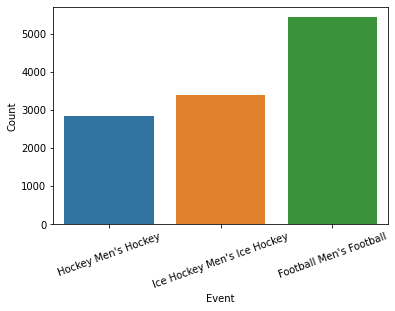

In [14]:
top_3 = q1[-3:]
plt.xticks(rotation=20)
sns.barplot(x=top_3.index, y=top_3);
plt.ylabel("Count")
plt.show()

In [15]:
q1[:3]

Event
Aeronautics Mixed Aeronautics                          1
Archery Men's Target Archery, 28 metres, Individual    2
Archery Men's Target Archery, 33 metres, Individual    2
Name: ID, dtype: int64

###### Q2: Country with most Gold medals

In [17]:
gold = df[df['Medal']=="Gold"]
gold.shape

(13372, 17)

In [18]:
q2 = gold.groupby("NOC")["ID"].nunique().sort_values()

In [19]:
q2[-3:]

NOC
GER     581
URS     821
USA    1919
Name: ID, dtype: int64

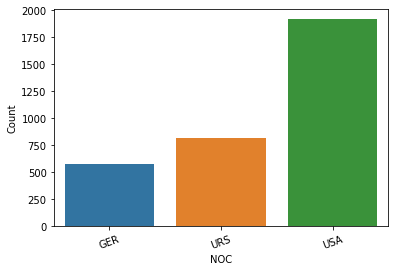

In [20]:
top_3 = q2[-3:]
plt.xticks(rotation=20)
sns.barplot(x=top_3.index, y=top_3);
plt.ylabel("Count")
plt.show()

###### Q3: Distribution of height over time

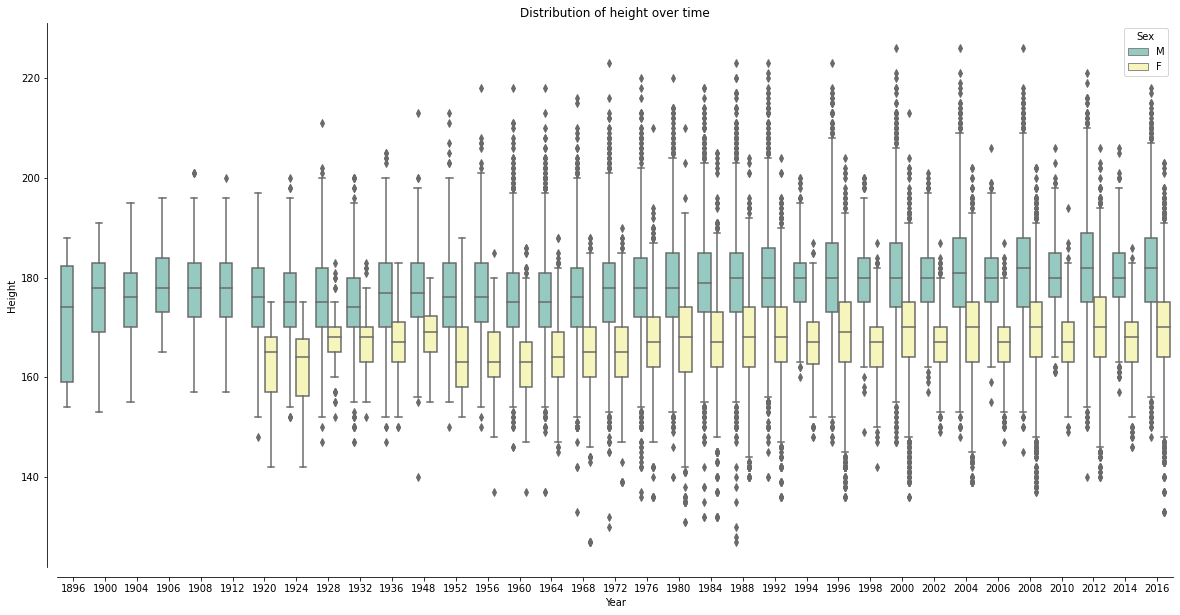

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,x='Year',y='Height',hue='Sex', palette="Set3")
sns.despine(offset=10)
plt.title('Distribution of height over time')
plt.show()